In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imp import reload
import sys
import scipy.special as sp

sys.path.append('../../')
import mg_si
from mg_si import plot as mplt
reload(mg_si)
reload(mg_si.planet)
reload(mg_si.core)
reload(mg_si.mantle)

reload(mplt)

<module 'mg_si.plot' from '../../mg_si/plot.py'>

In [4]:
pl = mg_si.planet.Custom()

In [26]:
pl.params.reactions.ParamCitationFeO = 'Fischer2015'
pl.params.reactions.ParamCitationSiO2 = 'Fischer2015'
pl.params.reactions.ParamCitationMgO = 'Badro2015'
# times = np.linspace(0,1000e6*365.25*24*3600,1000)
times = np.linspace(0,4568e6*365.25*24*3600,30000)
T_cmb0 = 4500
T_um0 = pl.mantle_layer.get_Tum0(T_cmb0)

pl.reactions._set_layer_thickness(300)
x0 = [T_cmb0, T_um0]

## Initial Core State
X_Mg_0 = 0.05
X_Si_0 = 0.2
X_O_0 = 0.2
Nm = 21
Ns = 21
No = 121
Xms = np.linspace(1e-5,0.05, Nm)
Xss = np.linspace(1e-5,0.2, Ns)
Xos = np.linspace(1e-5,0.3, No)
valid = np.zeros((Nm,Ns,No))
wpms = np.zeros((Nm,Ns,No))
wpss = np.zeros((Nm,Ns,No))
wpfs = np.zeros((Nm,Ns,No))
wpos = np.zeros((Nm,Ns,No))
for i,Xm in enumerate(Xms):
    for j,Xs in enumerate(Xss):
        for k,Xo in enumerate(Xos):
            try:
                Moles_0 = pl.reactions.compute_Moles_0(Xm, Xs, Xo, T_cmb0)
                valid[i,j,k] = 1.
                Xf = 1-Xm-Xs-Xo
                wpms[i,j,k],wpss[i,j,k],wpfs[i,j,k],wpos[i,j,k] = pl.reactions.core.X2wtp(np.array([Xm,Xs,Xf,Xo]))
            except:
                valid[i,j,k] = 0.

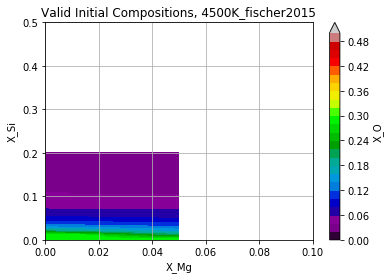

In [27]:
fig = plt.figure()
Omax = np.max(np.where(valid==1,Xos[None,None,:],-1),axis=-1)
contours = np.linspace(0,0.5,26)
plt.contourf(Xms, Xss, Omax, contours, cmap=plt.cm.nipy_spectral, extend='max')
plt.colorbar(label="X_O")
plt.xlabel('X_Mg')
plt.ylabel('X_Si')
plt.grid()
plt.title('Valid Initial Compositions, {:.0f}K_fischer2015'.format(T_cmb0))
plt.xlim(0,0.1)
plt.ylim(0,0.5)
plt.savefig('valid_initial_compositions_{:.0f}K_fischer2015.png'.format(T_cmb0))

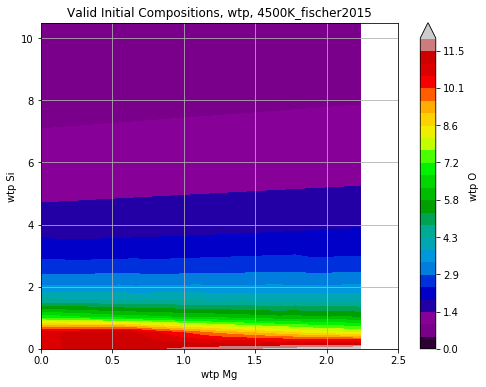

In [28]:
fig = plt.figure(figsize=(8,6))
wpOmax = np.max(np.where(valid==1,wpos,-1),axis=-1)
wpm = wpms[:,0,0]
wps = wpss[0,:,0]
contours = np.linspace(0,12,26)

plt.contourf(wpm*100, wps*100, wpOmax*100, contours, cmap=plt.cm.nipy_spectral, extend='max')
plt.colorbar(label="wtp O",format="%.1f")
plt.xlabel('wtp Mg')
plt.ylabel('wtp Si')
plt.grid()
plt.title('Valid Initial Compositions, wtp, {:.0f}K_fischer2015'.format(T_cmb0))
plt.xlim(0,2.5)
# plt.yticks(np.linspace(0,4,5))
plt.ylim(0,10.5)
plt.savefig('valid_initial_compositions_wtp_{:.0f}K_fischer2015.png'.format(T_cmb0))


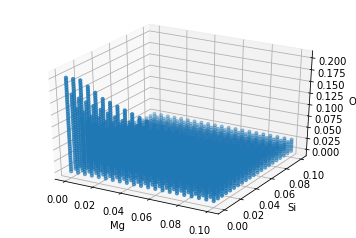

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
mm,ss,oo = np.meshgrid(Xms,Xss,Xos)
ax.scatter(mm, ss, oo, s=valid*10)
plt.xlabel('Mg')
plt.ylabel('Si')
ax.set_zlabel('O')

# ax.colorbar()